# metropolisSampler
- Sara Echeverría 21371
- Melissa Pérez 21385
- Ricardo Mendez 21289

Repository link: https://github.com/bl33h/metropolisSampler

## Task 1

1. ¿Cómo se puede verificar que una cadena MCMC ha alcanzado su estado estacionario y por qué esto es
importante?
    - Se pueden utilizar diagnósticos de convergencia para asegurar que las muestras reflejan la distribución objetivo, esto es esencial para inferencias precisas.
2. ¿En qué situaciones es preferible usar el Muestreador de Gibbs sobre Metropolis-Hastings?
    - Es mejor utilizarlo cuando las distribuciones condicionales son simples y conocidas, facilitando la eficiencia en problemas de alta dimensión.
3. ¿Cómo afecta la elección de la distribución de propuesta en la eficiencia del Algoritmo de
Metropolis-Hasting y cómo afecta la tasa de aceptación de las muestras?
    - Por su parte, una buena elección mejora la eficiencia y la tasa de aceptación, mientras que una mala elección puede resultar en muchos rechazos o progreso lento en la cadena.

## Task 2

1. Implementa el Algoritmo de Metropolis-Hastings en Python.
2. Utiliza una distribución de propuesta uniforme en el intervalo [−1,1].
3. Realiza al menos 10,000 iteraciones para obtener suficientes muestras.
4. Compara el histograma de las muestras obtenidas con la verdadera distribución normal N(0,1) usando la
biblioteca matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def targetDistribution(x):
    """define the target distribution, here a standard normal distribution"""
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def metropolisHastings(propWidth, iterations):
    """implements the metropolis-hastings algorithm"""
    samples = []
    currentX = 0  # arbitrary starting point
    for i in range(iterations):
        # propose a new point
        proposedX = currentX + np.random.uniform(-propWidth, propWidth)
        # calculate the acceptance probability
        acceptanceProb = min(1, targetDistribution(proposedX) / targetDistribution(currentX))
        # accept or reject the new point
        if np.random.rand() < acceptanceProb:
            currentX = proposedX
        samples.append(currentX)
    return samples

In [3]:
# parameters
propWidth = 1  # width of the proposal distribution (uniform)
iterations = 10000  # number of iteration

In [4]:
# execute the algorithm
samples = metropolisHastings(propWidth, iterations)

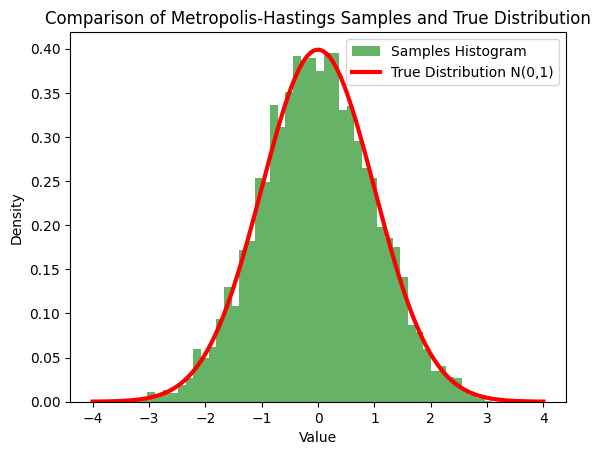

In [5]:
# visualization of the samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Samples Histogram')
x = np.linspace(-4, 4, 1000)
plt.plot(x, targetDistribution(x), 'r-', lw=3, label='True Distribution N(0,1)')
plt.title('Comparison of Metropolis-Hastings Samples and True Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

- El histograma muestra una buena aproximación a la distribución normal estándar (N(0,1)), cubriendo adecuadamente el rango central pero con algunas diferencias en las colas.
- Las muestras parecen converger hacia la distribución normal. Ajustar el ancho de la propuesta o incrementar el número de iteraciones podría ayudar a lograr una mejor correspondencia en las áreas extremas.